In [1]:


from fbprophet import Prophet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline #only needed for jupyter
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')


UsageError: unrecognized arguments: #only needed for jupyter


In [20]:
sales_df = pd.read_csv('store44.csv', index_col='date', parse_dates=True)

In [21]:
sales_df.head()

,transactions
date,
2013-01-02,4821
2013-01-03,3618
2013-01-04,4169
2013-01-05,4921
2013-01-06,4925


In [22]:
df = sales_df.reset_index()

In [23]:

df.head()

,date,transactions
0,2013-01-02,4821
1,2013-01-03,3618
2,2013-01-04,4169
3,2013-01-05,4921
4,2013-01-06,4925


In [25]:
df=df.rename(columns={'date':'ds', 'transactions':'y'})

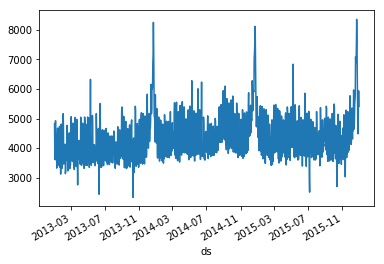

In [26]:
df.set_index('ds').y.plot()
plt.show()

In [27]:
df['y'] = np.log(df['y'])

In [28]:
df.tail()

,ds,y
1084,2015-12-27,8.445912
1085,2015-12-28,8.408494
1086,2015-12-29,8.545392
1087,2015-12-30,8.689128
1088,2015-12-31,8.596743


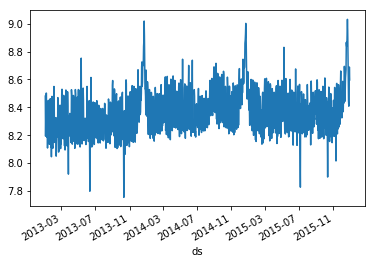

In [29]:
df.set_index('ds').y.plot()
plt.show()

In [30]:
model = Prophet()
model.fit(df);

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/anaconda/python2/lib/python2.7/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [32]:
future = model.make_future_dataframe(periods=24, freq = 'm')
future.tail()

,ds
1108,2017-08-31
1109,2017-09-30
1110,2017-10-31
1111,2017-11-30
1112,2017-12-31


In [33]:
forecast = model.predict(future)

In [34]:
forecast.tail()

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,seasonal,seasonal_lower,seasonal_upper,seasonalities,seasonalities_lower,seasonalities_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
1108,2017-08-31,8.407761,8.226377,8.588113,8.122908,8.536641,-0.076346,-0.076346,-0.076346,-0.076346,-0.076346,-0.076346,-0.116835,-0.116835,-0.116835,0.040490,0.040490,0.040490,8.331415
1109,2017-09-30,8.409011,8.214240,8.601825,8.323541,8.779781,0.147869,0.147869,0.147869,0.147869,0.147869,0.147869,0.175821,0.175821,0.175821,-0.027952,-0.027952,-0.027952,8.556880
1110,2017-10-31,8.410303,8.197173,8.620345,7.997498,8.465711,-0.169150,-0.169150,-0.169150,-0.169150,-0.169150,-0.169150,-0.114194,-0.114194,-0.114194,-0.054956,-0.054956,-0.054956,8.241153
1111,2017-11-30,8.411553,8.183447,8.637429,8.067914,8.561609,-0.098209,-0.098209,-0.098209,-0.098209,-0.098209,-0.098209,-0.116835,-0.116835,-0.116835,0.018626,0.018626,0.018626,8.313344
1112,2017-12-31,8.412845,8.164499,8.653885,8.476144,8.993375,0.335661,0.335661,0.335661,0.335661,0.335661,0.335661,0.140613,0.140613,0.140613,0.195048,0.195048,0.195048,8.748507


In [35]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1108,2017-08-31,8.331415,8.122908,8.536641
1109,2017-09-30,8.556880,8.323541,8.779781
1110,2017-10-31,8.241153,7.997498,8.465711
1111,2017-11-30,8.313344,8.067914,8.561609
1112,2017-12-31,8.748507,8.476144,8.993375


In [36]:
model.plot(forecast);

In [37]:
df.set_index('ds', inplace=True)
forecast.set_index('ds', inplace=True)


In [38]:
viz_df = sales_df.join(forecast[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')

In [39]:
viz_df.head()

,transactions,yhat,yhat_lower,yhat_upper
2013-01-02,4821.0,8.423724,8.330444,8.530231
2013-01-03,3618.0,8.285424,8.185959,8.392243
2013-01-04,4169.0,8.369842,8.277593,8.475167
2013-01-05,4921.0,8.534902,8.435893,8.639237
2013-01-06,4925.0,8.479423,8.377039,8.579469


In [40]:
viz_df['yhat_rescaled'] = np.exp(viz_df['yhat'])

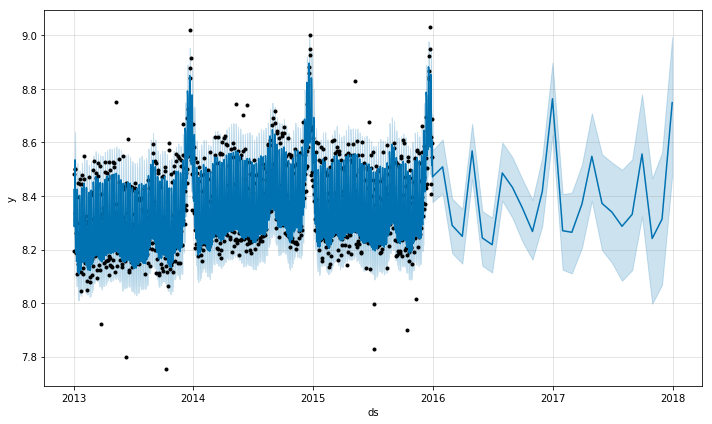

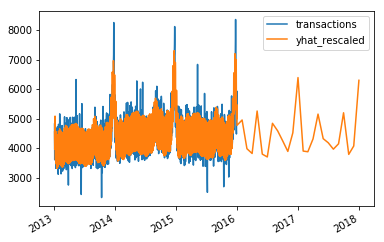

In [43]:
viz_df[['transactions', 'yhat_rescaled']].plot()
plt.show()

In [44]:
sales_df.index = pd.to_datetime(sales_df.index) #make sure our index as a datetime object
connect_date = sales_df.index[-2] #select the 2nd to last date

In [45]:
mask = (forecast.index > connect_date)
predict_df = forecast.loc[mask]

In [46]:
predict_df.head()

,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,seasonal,seasonal_lower,seasonal_upper,seasonalities,seasonalities_lower,seasonalities_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
ds,,,,,,,,,,,,,,,,,,
2015-12-31,8.382378,8.382378,8.382378,8.377304,8.569563,0.089044,0.089044,0.089044,0.089044,0.089044,0.089044,-0.116835,-0.116835,-0.116835,0.205879,0.205879,0.205879,8.471423
2016-01-31,8.383670,8.382216,8.384906,8.409024,8.610907,0.125060,0.125060,0.125060,0.125060,0.125060,0.125060,0.140613,0.140613,0.140613,-0.015554,-0.015554,-0.015554,8.508730
2016-02-29,8.384879,8.380167,8.389575,8.186701,8.390378,-0.094454,-0.094454,-0.094454,-0.094454,-0.094454,-0.094454,-0.074068,-0.074068,-0.074068,-0.020386,-0.020386,-0.020386,8.290425
2016-03-31,8.386171,8.376566,8.395395,8.147465,8.351519,-0.136955,-0.136955,-0.136955,-0.136955,-0.136955,-0.136955,-0.116835,-0.116835,-0.116835,-0.020120,-0.020120,-0.020120,8.249216
2016-04-30,8.387421,8.372560,8.401354,8.462974,8.669763,0.180835,0.180835,0.180835,0.180835,0.180835,0.180835,0.175821,0.175821,0.175821,0.005013,0.005013,0.005013,8.568256


In [47]:
viz_df = sales_df.join(predict_df[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')
viz_df['yhat_scaled']=np.exp(viz_df['yhat'])

In [48]:
viz_df.head()

,transactions,yhat,yhat_lower,yhat_upper,yhat_scaled
2013-01-02,4821.0,NaN,NaN,NaN,NaN
2013-01-03,3618.0,NaN,NaN,NaN,NaN
2013-01-04,4169.0,NaN,NaN,NaN,NaN
2013-01-05,4921.0,NaN,NaN,NaN,NaN
2013-01-06,4925.0,NaN,NaN,NaN,NaN


In [49]:
viz_df.tail()

,transactions,yhat,yhat_lower,yhat_upper,yhat_scaled
2017-08-31,NaN,8.331415,8.122908,8.536641,4152.289136
2017-09-30,NaN,8.556880,8.323541,8.779781,5202.423005
2017-10-31,NaN,8.241153,7.997498,8.465711,3793.911246
2017-11-30,NaN,8.313344,8.067914,8.561609,4077.926649
2017-12-31,NaN,8.748507,8.476144,8.993375,6301.271667


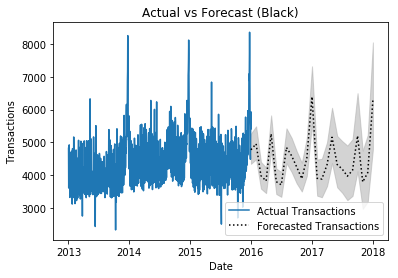

In [54]:
fig, ax1 = plt.subplots()
ax1.plot(viz_df.transactions)
ax1.plot(viz_df.yhat_scaled, color='black', linestyle=':')
ax1.fill_between(viz_df.index, np.exp(viz_df['yhat_upper']), np.exp(viz_df['yhat_lower']), alpha=0.5, color='darkgray')
ax1.set_title('Actual vs Forecast (Black)')
ax1.set_ylabel('Transactions')
ax1.set_xlabel('Date')

L=ax1.legend() #get the legend
L.get_texts()[0].set_text('Actual Transactions') #change the legend text for 1st plot
L.get_texts()[1].set_text('Forecasted Transactions') #change the legend text for 2nd plot
plt.show()